# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 92.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


^C


## Importing the necessary libraries

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [ ]:
# Import the first file - True.csv
true_df = pd.read_csv("True.csv")
print(true_df.shape)
# Import the second file - Fake.csv
fake_df = pd.read_csv("Fake.csv")
print(fake_df.shape)

(21417, 3)
(23523, 3)


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [ ]:
# Inspect the DataFrame with True News to understand the given data


print("\nMissing Values in True News DataFrame:")
print(true_df.isnull().sum())

print("\nFirst 2 rows of True News DataFrame:")
true_df.head(2)



Missing Values in True News DataFrame:
title    0
text     0
date     0
dtype: int64

First 2 rows of True News DataFrame:


title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   
1  U.S. military to accept transgender recruits on Monday: Pentagon   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
# Inspect the DataFrame with Fake News to understand the given data

print("\nMissing Values in Fake News DataFrame:")
print(fake_df.isnull().sum())

print("\nFirst 2 rows of Fake News DataFrame:")
fake_df.head(2)


Missing Values in Fake News DataFrame:
title    21
text     21
date     42
dtype: int64

First 2 rows of Fake News DataFrame:


title  \
0   Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1             Drunk Bragging Trump Staffer Started Russian Collusion Investigation   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            text  \
0  Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like t

In [ ]:
# Print the column details for True News DataFrame
print(true_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None


In [ ]:
# Print the column details for Fake News Dataframe
print(fake_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None


In [ ]:
# Print the column names of both DataFrames
print("Columns in True News DataFrame:", true_df.columns.tolist())
print("Columns in Fake News DataFrame:", fake_df.columns.tolist())

Columns in True News DataFrame: ['title', 'text', 'date']
Columns in Fake News DataFrame: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [ ]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1

# Check the update
print(true_df.head())

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

# Check the update
print(fake_df.head())

                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [ ]:
# Combine the true and fake news DataFrames into a single DataFrame
news_df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)
news_df.shape

(44940, 4)

In [ ]:
# Display the first 5 rows of the combined DataFrame to verify the result
news_df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [ ]:
# Check Presence of Null Values
print(news_df.isnull().sum())

title         21
text          21
date          42
news_label     0
dtype: int64


In [ ]:
# Handle Rows with Null Values
print(news_df.shape)
news_df = news_df.dropna().reset_index(drop=True)
print(news_df.isnull().sum())
news_df.shape

(44940, 4)
title         0
text          0
date          0
news_label    0
dtype: int64


(44898, 4)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [ ]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_df['news_text'] = news_df['title'].astype(str) + " " + news_df['text'].astype(str)
# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_df = news_df.drop(columns=['title', 'text', 'date'])
# Display the first 5 rows of the updated DataFrame to check the result
news_df.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [ ]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df_clean = pd.DataFrame()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [ ]:
import re
import string
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove text inside square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    return text



#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [ ]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['clean_text'] = df_clean['clean_text'].apply(clean_text)

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags


def clean_and_lemmatize(text):
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    # POS tagging + lemmatization
    pos_tags = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    return " ".join(tokens), " ".join(lemmatized)



#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
news_df[['clean_text', 'lemmatized_text']] = news_df['news_text'].apply(
    lambda x: pd.Series(clean_and_lemmatize(x))
)

# Add 'news_label' column to the new dataframe for topic identification
df_clean = news_df[['clean_text', 'lemmatized_text', 'news_label']]

### Save the Cleaned data as a csv file (Recommended)

In [ ]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("clean_df.csv")

from google.colab import files
df_clean.to_csv("clean_news.csv", index=False)
files.download("clean_news.csv")

In [ ]:
# Check the first few rows of the DataFrame
df_clean.head()

clean_text  \
0                                                                                                                                                                                                                                                                                                                                                  budget fight looms republicans flip fiscal script washington reuters the head conservative republican faction congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republicans representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january when return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases non defense discretionary spending programs support education scientific research infrastructure public health environmental protection the trump administration already willing say going increase non defense discretionary spending percent meadows chairman small influential house freedom caucus said program now democrats saying enough need give government pay raise percent for fiscal conservative see rationale eventually run people money said meadows among republicans voted late december party debt financed tax overhaul expected balloon federal budget deficit add trillion years trillion national debt interesting hear mark talk fiscal responsibility democratic representative joseph crowley said cbs crowley said republican tax bill would require united states borrow trillion paid future generations finance tax cuts corporations rich this one least fiscally responsible bills ever seen passed history house representatives think going paying many many years come crowley said republicans insist tax package biggest tax overhaul years boost economy job growth house speaker paul ryan also supported tax bill recently went meadows making clear radio interview welfare entitlement reform party often calls would top republican priority republican parlance entitlement programs mean food stamps housing assistance medicare medicaid health insurance elderly poor disabled well programs created washington assist needy democrats seized ryan early december remarks saying showed republicans would try pay tax overhaul seeking spending cuts social programs but goals house republicans may take back seat senate votes democrats needed approve budget prevent government shutdown democrats use leverage senate republicans narrowly control defend discretionary non defense programs social spending tackling issue dreamers people brought illegally country children trump september put march expiration date deferred action childhood arrivals daca program protects young immigrants deportation provides work permits the president said recent twitter messages wants funding proposed mexican border wall immigration law changes exchange agreeing help dreamers representative debbie dingell told cbs favor linking issue policy objectives wall funding need daca clean said wednesday trump aides meet congressional leaders discuss issues that followed weekend strategy sessions trump republican leaders jan white house said trump also scheduled meet sunday florida republican governor rick scott wants emergency aid the house passed billion aid package hurricanes florida texas puerto rico wildfires california the package far exceeded billion requested trump administration the senate yet voted aid   
1                                                                                                                                                                                                                                    

In [ ]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [ ]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clean_text       44898 non-null  object
 1   lemmatized_text  44898 non-null  object
 2   news_label       44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [ ]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
X = df_clean['clean_text']
y = df_clean['news_label']
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])


Training set size: 31428
Validation set size: 13470


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [ ]:
# Add a new column to calculate the character length of cleaned news text
df_clean['clean_text_length'] = df_clean['clean_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['lemmatized_text_length'] = df_clean['lemmatized_text'].apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

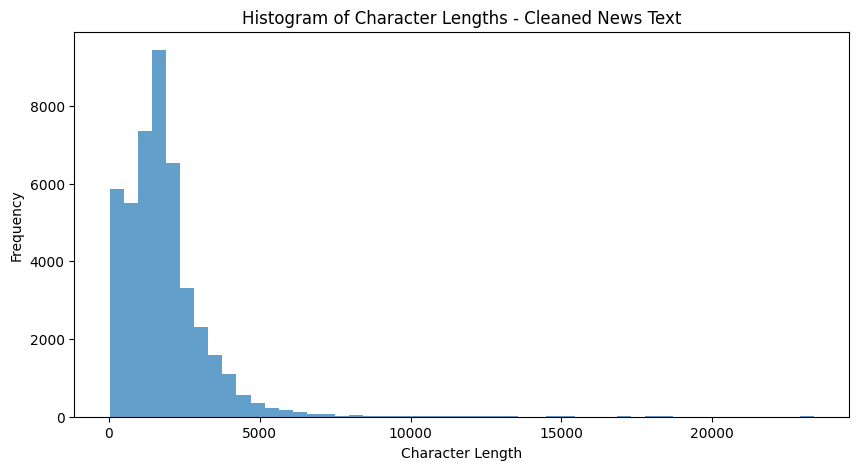

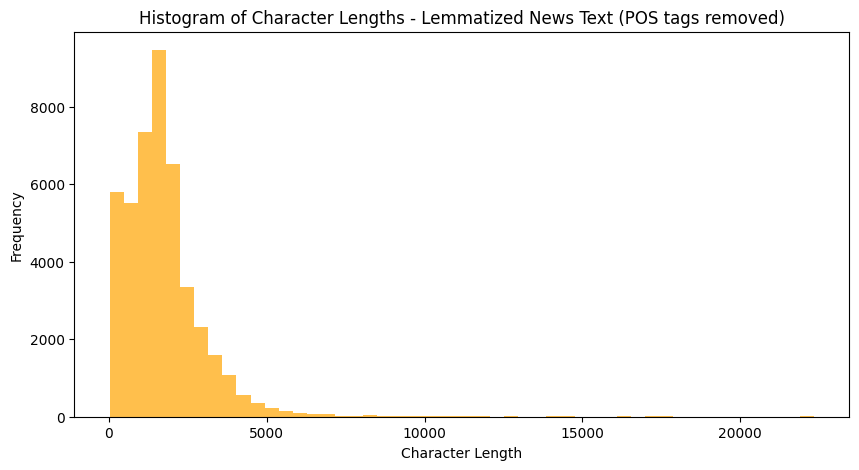

In [ ]:
# Create a histogram plot to visualise character lengths
import matplotlib.pyplot as plt

# Add histogram for cleaned news text
plt.figure(figsize=(10,5))
plt.hist(df_clean['clean_text_length'], bins=50, alpha=0.7)
plt.title("Histogram of Character Lengths - Cleaned News Text")
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.show()

# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(10,5))
plt.hist(df_clean['lemmatized_text_length'], bins=50, alpha=0.7, color='orange')
plt.title("Histogram of Character Lengths - Lemmatized News Text (POS tags removed)")
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

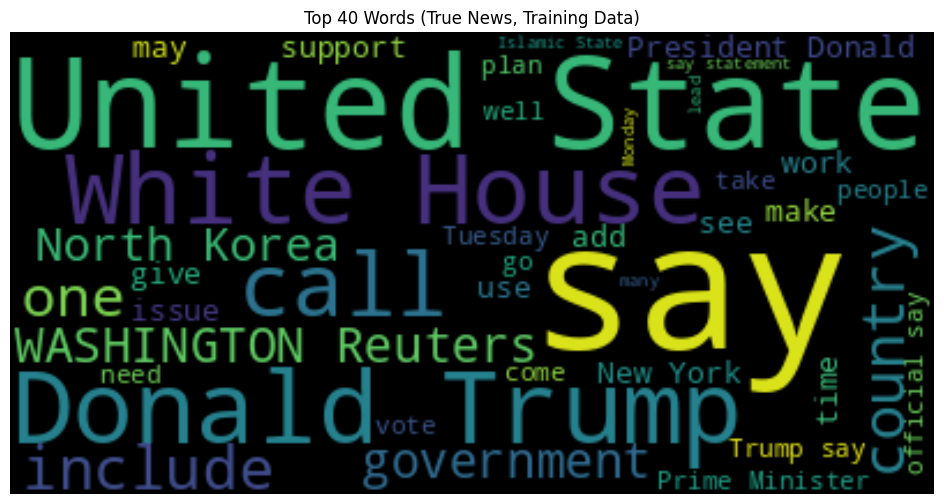

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Subset the training rows using indices from the split
train_df = df_clean.loc[X_train.index]

# Keep only True news (label = 1)
true_train_df = train_df[train_df['news_label'] == 1]

# Combine processed (lemmatized) text into one string, ensuring non-strings are handled
true_text = " ".join(true_train_df['lemmatized_text'].astype(str).fillna(""))

# Generate the word cloud (top 40 words)
wc = WordCloud(max_words=40).generate(true_text)

# Display
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words (True News, Training Data)")
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

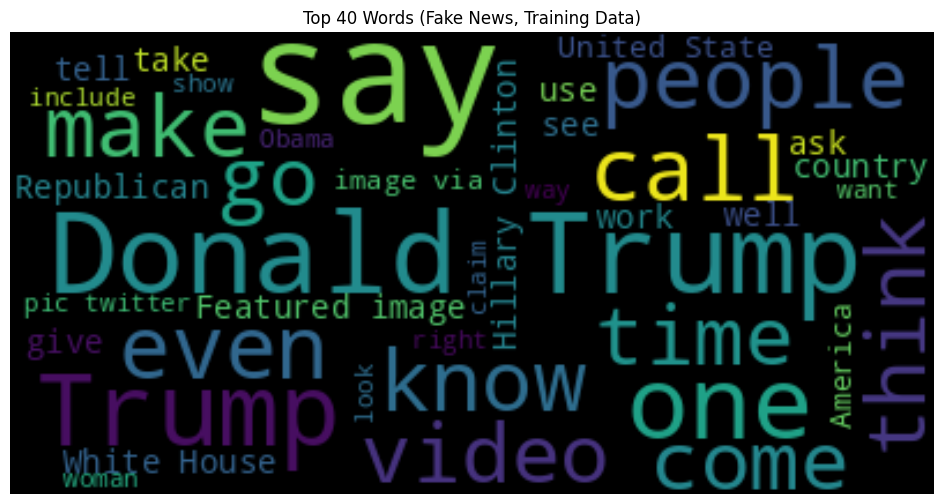

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
train_df = df_clean.loc[X_train.index]

# Keep only Fake news (label = 0)
fake_train_df = train_df[train_df['news_label'] == 0]

# Combine processed (lemmatized) text into one string, ensuring non-strings are handled
fake_text = " ".join(fake_train_df['lemmatized_text'].astype(str).fillna(""))

# Generate the word cloud (top 40 words)
wc = WordCloud(max_words=40).generate(fake_text)

# Display
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words (Fake News, Training Data)")
plt.show()



### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write a function to get the specified top n-grams
from collections import Counter
from nltk import ngrams
import pandas as pd

def get_top_ngrams(corpus, n=2, top_k=20):
    """
    Get the top_k most frequent n-grams from a corpus.
    Parameters:
        corpus: list/series of text strings
        n: size of n-gram (e.g., 1=unigram, 2=bigram, 3=trigram)
        top_k: number of top results to return
    """
    # Join all text into one large string and tokenize
    tokens = " ".join(corpus.astype(str)).split()

    # Generate n-grams
    n_grams = ngrams(tokens, n)

    # Count frequencies
    ngram_counts = Counter(n_grams)

    # Get top_k n-grams as DataFrame
    ngram_df = pd.DataFrame(ngram_counts.most_common(top_k),
                            columns=['ngram', 'frequency'])
    ngram_df['ngram'] = ngram_df['ngram'].apply(lambda x: " ".join(x))

    return ngram_df




##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [ ]:
# Handle NaN values in the text data
df_clean['clean_text'] = df_clean['clean_text'].fillna("")
df_clean['lemmatized_text'] = df_clean['lemmatized_text'].fillna("")

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
        ngram  frequency
0         say      82776
1       Trump      42562
2         The      41410
3       would      22114
4     Reuters      20390
5        year      15844
6  government      13817
7   President      13077
8       state      12645
9  Republican      11917


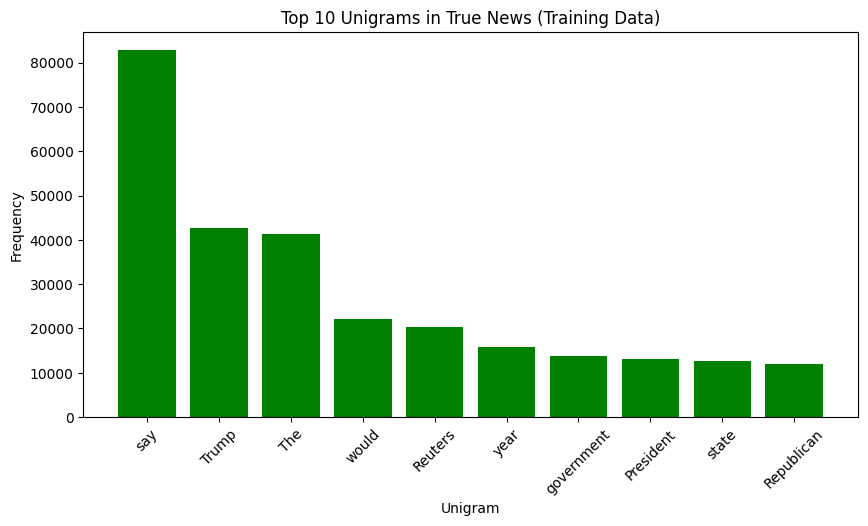

In [ ]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

# Filter True News from training set
true_train_df = df_clean.loc[X_train.index]
true_train_df = true_train_df[true_train_df['news_label'] == 1]

# Get Top 10 Unigrams
top_unigrams_true = get_top_ngrams(true_train_df['lemmatized_text'], n=1, top_k=10)

# Print table
print("Top 10 Unigrams in True News:")
print(top_unigrams_true)

# Plot bar graph
plt.figure(figsize=(10,5))
plt.bar(top_unigrams_true['ngram'], top_unigrams_true['frequency'], color='green')
plt.title("Top 10 Unigrams in True News (Training Data)")
plt.xlabel("Unigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
                ngram  frequency
0       United States       8469
1        Donald Trump       7185
2         White House       6524
3  WASHINGTON Reuters       4707
4         North Korea       4231
5    President Donald       4176
6        official say       2876
7           Trump say       2817
8         Reuters The       2770
9            New York       2755


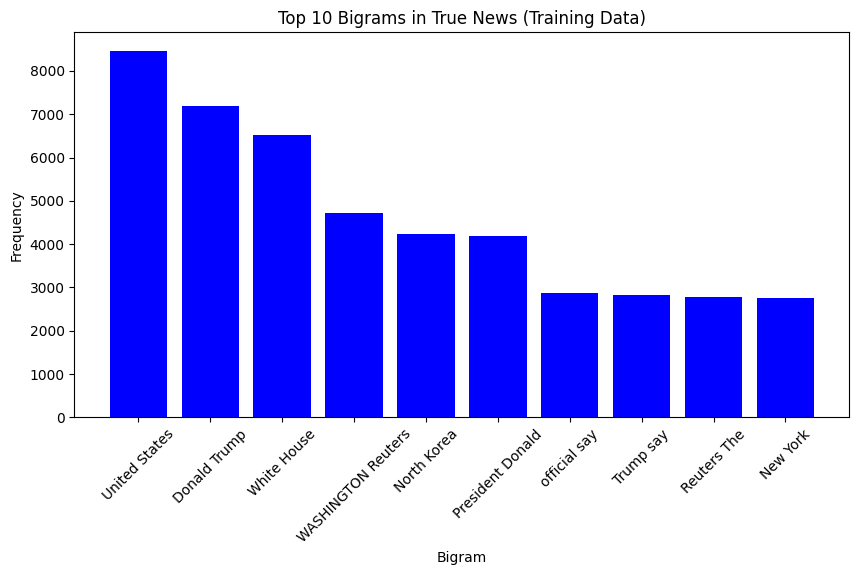

In [ ]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_train_df = df_clean.loc[X_train.index]
true_train_df = true_train_df[true_train_df['news_label'] == 1]

# Get Top 10 Bigrams
top_bigrams_true = get_top_ngrams(true_train_df['lemmatized_text'], n=2, top_k=10)

# Print table
print("Top 10 Bigrams in True News:")
print(top_bigrams_true)

# Plot bar graph
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_true['ngram'], top_bigrams_true['frequency'], color='blue')
plt.title("Top 10 Bigrams in True News (Training Data)")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
                          ngram  frequency
0        President Donald Trump       4135
1        President Barack Obama       2024
2        WASHINGTON Reuters The       1101
3      Reuters President Donald       1056
4  WASHINGTON Reuters President       1049
5             The United States        898
6               The White House        780
7               White House say        775
8              NEW YORK Reuters        596
9            elect Donald Trump        582


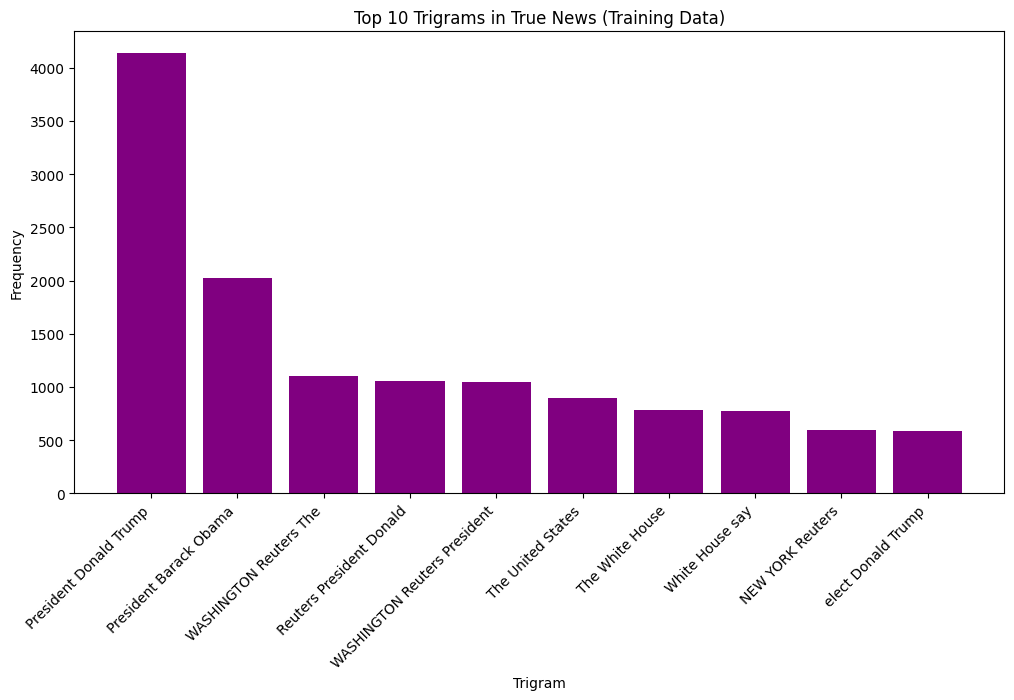

In [ ]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
# Filter True News from training set
true_train_df = df_clean.loc[X_train.index]
true_train_df = true_train_df[true_train_df['news_label'] == 1]

# Get Top 10 Trigrams
top_trigrams_true = get_top_ngrams(true_train_df['lemmatized_text'], n=3, top_k=10)

# Print table
print("Top 10 Trigrams in True News:")
print(top_trigrams_true)

# Plot bar graph
plt.figure(figsize=(12,6))
plt.bar(top_trigrams_true['ngram'], top_trigrams_true['frequency'], color='purple')
plt.title("Top 10 Trigrams in True News (Training Data)")
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
     ngram  frequency
0    Trump      60598
1      The      42850
2      say      37741
3   people      17523
4     make      16006
5    would      15967
6      one      15073
7    Obama      14007
8      get      13832
9  Clinton      13593


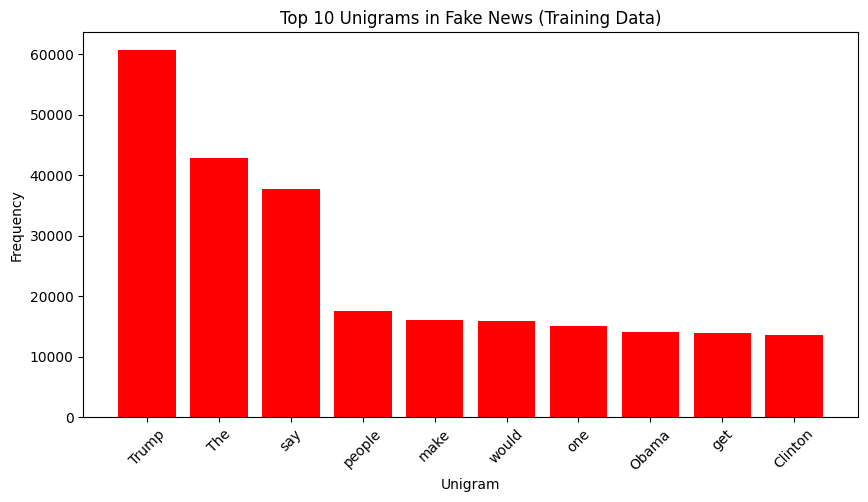

In [ ]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
# Filter Fake News from training set
fake_train_df = df_clean.loc[X_train.index]
fake_train_df = fake_train_df[fake_train_df['news_label'] == 0]

# Get Top 10 Unigrams
top_unigrams_fake = get_top_ngrams(fake_train_df['lemmatized_text'], n=1, top_k=10)

# Print table
print("Top 10 Unigrams in Fake News:")
print(top_unigrams_fake)

# Plot bar graph
plt.figure(figsize=(10,5))
plt.bar(top_unigrams_fake['ngram'], top_unigrams_fake['frequency'], color='red')
plt.title("Top 10 Unigrams in Fake News (Training Data)")
plt.xlabel("Unigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
             ngram  frequency
0     Donald Trump      11812
1  Hillary Clinton       5156
2   Featured image       5062
3      White House       4832
4      twitter com       4573
5    United States       4547
6      pic twitter       4304
7        image via       4278
8         New York       3018
9  President Obama       2966


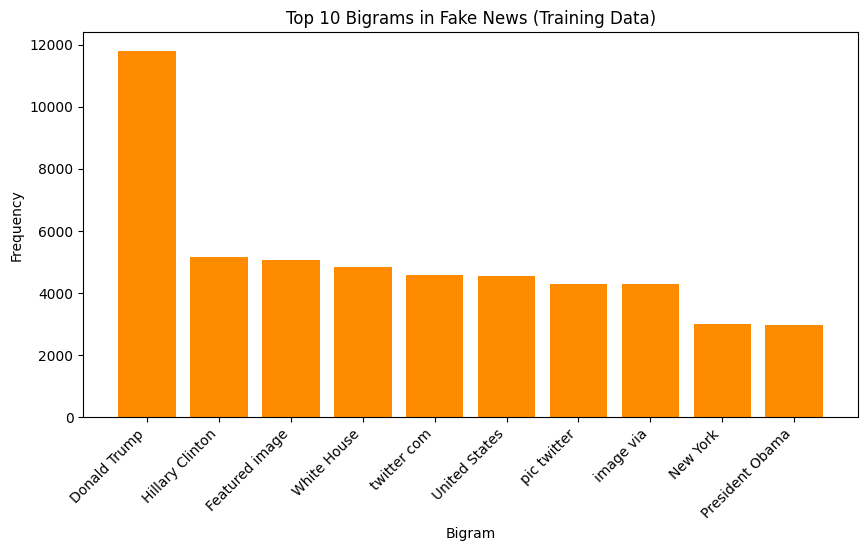

In [ ]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
# Filter Fake News from training set
fake_train_df = df_clean.loc[X_train.index]
fake_train_df = fake_train_df[fake_train_df['news_label'] == 0]

# Get Top 10 Bigrams
top_bigrams_fake = get_top_ngrams(fake_train_df['lemmatized_text'], n=2, top_k=10)

# Print table
print("Top 10 Bigrams in Fake News:")
print(top_bigrams_fake)

# Plot bar graph
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_fake['ngram'], top_bigrams_fake['frequency'], color='darkorange')
plt.title("Top 10 Bigrams in Fake News (Training Data)")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
                          ngram  frequency
0               pic twitter com       4304
1            Featured image via       4142
2  Donald Trump realDonaldTrump       1177
3                New York Times       1076
4            Black Lives Matter        917
5        President Donald Trump        643
6        President Barack Obama        636
7             NEWS Century Wire        608
8               image via video        565
9          video screen capture        518


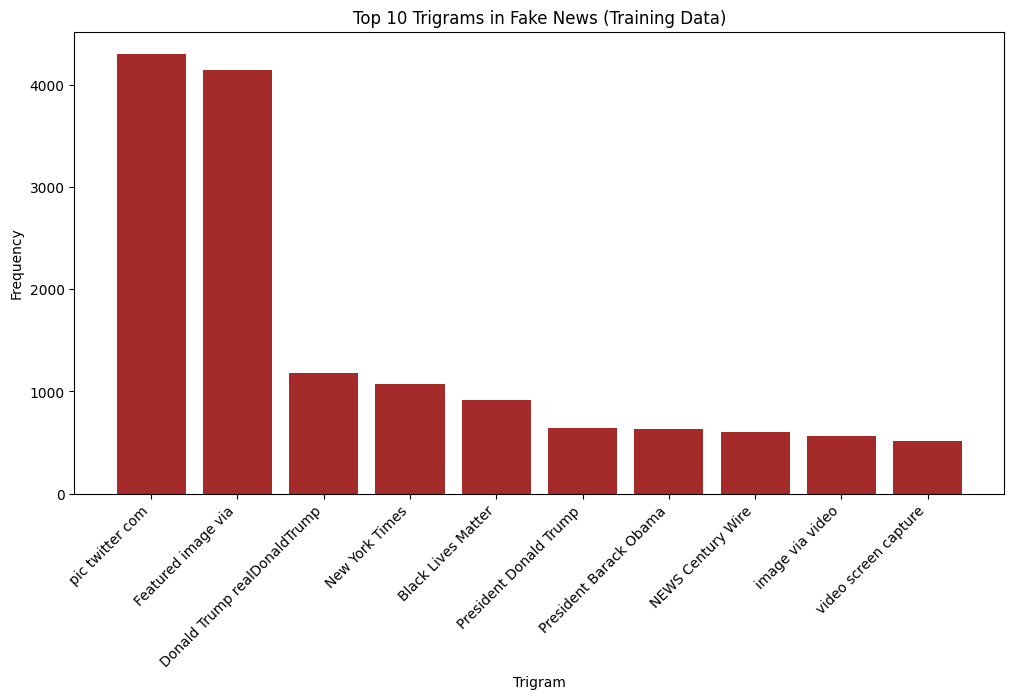

In [ ]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
# Filter Fake News from training set
fake_train_df = df_clean.loc[X_train.index]
fake_train_df = fake_train_df[fake_train_df['news_label'] == 0]

# Get Top 10 Trigrams
top_trigrams_fake = get_top_ngrams(fake_train_df['lemmatized_text'], n=3, top_k=10)

# Print table
print("Top 10 Trigrams in Fake News:")
print(top_trigrams_fake)

# Plot bar graph
plt.figure(figsize=(12,6))
plt.bar(top_trigrams_fake['ngram'], top_trigrams_fake['frequency'], color='brown')
plt.title("Top 10 Trigrams in Fake News (Training Data)")
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 27.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

print("Downloading word2vec-google-news-300")
w2v_model = api.load("word2vec-google-news-300")

print("Model loaded successfully!")
print("Vector size:", w2v_model.vector_size)
print("Example vector for 'news':")
print(w2v_model['news'][:10])


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully!
Vector size: 300
Example vector for 'news':
[-0.13867188  0.04370117 -0.13085938 -0.16796875 -0.06054688 -0.07080078
  0.00854492 -0.09960938  0.19628906  0.14648438]


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [ ]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def document_vector(doc, model, vector_size=300):
    # keep only words in vocab
    tokens = [word for word in doc.split() if word in model]
    if len(tokens) == 0:
        return np.zeros(vector_size)  # empty doc = zero vector
    return np.mean([model[word] for word in tokens], axis=0)

# Training features
X_train_tokens = X_train.apply(lambda x: str(x))   # ensure string
X_train_vectors = np.array([document_vector(text, w2v_model) for text in X_train_tokens])

# Validation features
X_val_tokens = X_val.apply(lambda x: str(x))
X_val_vectors = np.array([document_vector(text, w2v_model) for text in X_val_tokens])

# Target variables
y_train_vec = y_train.values
y_val_vec = y_val.values

## Extract the target variable for the training data and validation data
print("Training features shape:", X_train_vectors.shape)
print("Validation features shape:", X_val_vectors.shape)
print("Target variable shapes:", y_train_vec.shape, y_val_vec.shape)

Training features shape: (31428, 300)
Validation features shape: (13470, 300)
Target variable shapes: (31428,) (13470,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [ ]:
## Initialise Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
## Train Logistic Regression model on training data
log_reg.fit(X_train_vectors, y_train_vec)
## Predict on validation data
y_val_pred = log_reg.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_val_vec, y_val_pred)
precision = precision_score(y_val_vec, y_val_pred)
recall = recall_score(y_val_vec, y_val_pred)
f1 = f1_score(y_val_vec, y_val_pred)

# Print results
print("Logistic Regression Model Evaluation on Validation Data:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")


Logistic Regression Model Evaluation on Validation Data:
Accuracy  : 0.9581
Precision : 0.9511
Recall    : 0.9617
F1-Score  : 0.9564


In [ ]:
# Classification Report
report = classification_report(y_val_vec, y_val_pred, target_names=["Fake News (0)", "True News (1)"])

print("Classification Report of the Logistic Regression:")
print(report)


Classification Report of the Logistic Regression:
               precision    recall  f1-score   support

Fake News (0)       0.96      0.95      0.96      7045
True News (1)       0.95      0.96      0.96      6425

     accuracy                           0.96     13470
    macro avg       0.96      0.96      0.96     13470
 weighted avg       0.96      0.96      0.96     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
dt_clf.fit(X_train_vectors, y_train_vec)
## Predict on validation data
y_val_pred_dt = dt_clf.predict(X_val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_dt = accuracy_score(y_val_vec, y_val_pred_dt)
precision_dt = precision_score(y_val_vec, y_val_pred_dt)
recall_dt = recall_score(y_val_vec, y_val_pred_dt)
f1_dt = f1_score(y_val_vec, y_val_pred_dt)

# Print results
print("Decision Tree Evaluation on Validation Data:")
print(f"Accuracy  : {accuracy_dt:.4f}")
print(f"Precision : {precision_dt:.4f}")
print(f"Recall    : {recall_dt:.4f}")
print(f"F1-Score  : {f1_dt:.4f}")

Decision Tree Evaluation on Validation Data:
Accuracy  : 0.8885
Precision : 0.8977
Recall    : 0.8647
F1-Score  : 0.8809


In [ ]:
# Classification Report
report_dt = classification_report(y_val_vec, y_val_pred_dt, target_names=["Fake News (0)", "True News (1)"])
print("Classification Report:")
print(report_dt)

Classification Report:
               precision    recall  f1-score   support

Fake News (0)       0.88      0.91      0.90      7045
True News (1)       0.90      0.86      0.88      6425

     accuracy                           0.89     13470
    macro avg       0.89      0.89      0.89     13470
 weighted avg       0.89      0.89      0.89     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)
## Train Random Forest model on training data
rf_clf.fit(X_train_vectors, y_train_vec)
## Predict on validation data
y_val_pred_rf = rf_clf.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_val_vec, y_val_pred_rf)
precision_rf = precision_score(y_val_vec, y_val_pred_rf)
recall_rf = recall_score(y_val_vec, y_val_pred_rf)
f1_rf = f1_score(y_val_vec, y_val_pred_rf)

# Print results
print("Random Forest Evaluation on Validation Data:")
print(f"Accuracy  : {accuracy_rf:.4f}")
print(f"Precision : {precision_rf:.4f}")
print(f"Recall    : {recall_rf:.4f}")
print(f"F1-Score  : {f1_rf:.4f}")


Random Forest Evaluation on Validation Data:
Accuracy  : 0.9542
Precision : 0.9545
Recall    : 0.9493
F1-Score  : 0.9519


In [ ]:
# Classification Report
report_rf = classification_report(
    y_val_vec,
    y_val_pred_rf,
    target_names=["Fake News (0)", "True News (1)"]
)

print("Random Forest Classification Report:")
print(report_rf)

Random Forest Classification Report:
               precision    recall  f1-score   support

Fake News (0)       0.95      0.96      0.96      7045
True News (1)       0.95      0.95      0.95      6425

     accuracy                           0.95     13470
    macro avg       0.95      0.95      0.95     13470
 weighted avg       0.95      0.95      0.95     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.



# Model Training & Evaluation Summary  

## True vs Fake News  
- **Length & Word Choice**  
  - True news articles were usually longer and leaned more on factual nouns.
  - Fake news pieces tended to be shorter, with more dramatic or sensational wording.

- **Semantics Matter**  
  - Using **Word2Vec embeddings** helped capture meaning, not just raw counts of words.  
  - For example, terms like *president*, *leader*, and *official* ended up grouped closely together in the embedding space, which gave the models better context when classifying.  

---

## ⚖️ Model Results  

|      Model          |  Accuracy |  Precision |   Recall  |  F1-Score |
|---------------------|-----------|------------|-----------|-----------|
| Logistic Regression | **95.8%** |   95.1%    | **96.2%** | **95.6%** |
| Decision Tree       |   88.9%   |   89.8%    |   86.5%   |   88.1%   |
| Random Forest       |   95.4%   |  **95.5%** |   94.9%   |   95.2%   |

---

## Best Model & Why  
- **BEST Model:** Logistic Regression  
- **Reason:** It gave the best **recall** (96.2%).  
  - For fake news detection, recall is especially important — it is better to catch as many fake stories as possible, even if a few real ones get flagged along the way.  

---

## What Worked & What Didnot  
- **Worked Well:**  
  - Word2Vec added a lot of value since it captured the meaning of words, not just their frequency. This made the models more reliable across different kinds of text.  

- **Limitations:**  
  - Averaging embeddings ignores context and word order, so some nuances were lost.  
  - A more advanced model like **BERT** (which keeps track of word order and context) would likely perform even better.  

---

## Key Takeaway  
- **Logistic Regression with Word2Vec embeddings** turned out to be the best balance of accuracy and recall.  
- Using semantic features made the difference in separating true from fake news.  
- Focusing on **recall** ensured that misinformation was caught more effectively, which is the main goal of the project.  
